##### Notebook purpose: 

- Looking at first model run
- familiarizing with output, calculating sector-wide averages


In [34]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob

#import mapfxn as mf
#reload(mf)

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [35]:
#load a landmask
topend = 37
lmnc = nc.Dataset('../UTILS/sector_landmask.nc')
print(lmnc)
lm = lmnc['sectormask'][0:topend,:]
print(np.shape(lm))

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    description: made in EVAL_forcing/so_landmask.ipynb, 1 land, 2 atl, 3 ind, 4 pac
    dimensions(sizes): x(182), y(149)
    variables(dimensions): float32 sectormask(y,x)
    groups: 
(37, 182)


In [36]:
runhorse = True
if runhorse:
    now = datetime.now()


    rdir = '/gpfs/data/greenocean/software/runs/'
    trun = 'TOM12_TJ_T001'

    #ORCA2_1m_19750101_19751231_ptrc_T.nc
    yr = 1948
    

    dic_sum_bysector = np.zeros([3,len(yrs)])
    dic_wint_bysector = np.zeros([3,len(yrs)])
    sal_sum_bysector = np.zeros([3,len(yrs)])
    sal_wint_bysector = np.zeros([3,len(yrs)])
    temp_sum_bysector = np.zeros([3,len(yrs)])
    temp_wint_bysector = np.zeros([3,len(yrs)])
    
    for i in range(0,len(yrs)):
        yr = yrs[i]
        if yr%10==0:
            print(yr)
        if yr<= 1988:
            trun = 'TOM12_TJ_T001'
        if yr > 1988:
            trun = 'TOM12_TJ_NC02'
        #open ptrc_T and grid_T
        w = glob.glob(f'{rdir}{trun}/ORCA*{yr}*ptrc_T.nc')
        tnam = (w[0])
        t_ptrc = nc.Dataset(tnam)
        dic = t_ptrc['DIC'][:,0,0:topend,:]
        w = glob.glob(f'{rdir}{trun}/ORCA*{yr}*grid_T.nc')
        tnam = (w[0])
        t_grid = nc.Dataset(tnam)
        sal = t_grid['vosaline'][:,0,0:topend,:]
        temp = t_grid['votemper'][:,0,0:topend,:]

        #get out dic and salinity
        dic_sum = np.zeros([3,topend,182])
        dic_sum[0,:,:] = dic[0,:,:]; dic_sum[1,:,:] = dic[1,:,:]; dic_sum[2,:,:] = dic[11,:,:]
        dic_wint = dic[5:8,:,:]
        dic_sum_mn = np.nanmean(dic_sum, axis = 0)
        dic_wint_mn = np.nanmean(dic_wint, axis = 0)

        sal_sum = np.zeros([3,topend,182])
        sal_sum[0,:,:] = sal[0,:,:]; sal_sum[1,:,:] = sal[1,:,:]; sal_sum[2,:,:] = sal[11,:,:]
        sal_wint = sal[5:8,:,:]
        sal_sum_mn = np.nanmean(sal_sum, axis = 0)
        sal_wint_mn = np.nanmean(sal_wint, axis = 0)

        temp_sum = np.zeros([3,topend,182])
        temp_sum[0,:,:] = temp[0,:,:]; temp_sum[1,:,:] = temp[1,:,:]; temp_sum[2,:,:] = temp[11,:,:]
        temp_wint = temp[5:8,:,:]
        temp_sum_mn = np.nanmean(temp_sum, axis = 0)
        temp_wint_mn = np.nanmean(temp_wint, axis = 0)

        for s in range(0,3):
            dic_sum_bysector[s,i] = np.nanmean(dic_sum_mn[lm == (s+2)])
            dic_wint_bysector[s,i] = np.nanmean(dic_wint_mn[lm == (s+2)])
            sal_sum_bysector[s,i] = np.nanmean(sal_sum_mn[lm == (s+2)])
            sal_wint_bysector[s,i] = np.nanmean(sal_wint_mn[lm == (s+2)])        
            temp_sum_bysector[s,i] = np.nanmean(temp_sum_mn[lm == (s+2)])
            temp_wint_bysector[s,i] = np.nanmean(temp_wint_mn[lm == (s+2)])    



    now2 = datetime.now()
    print(now2-now)



# print(tnc['DIC'][0,:,145,140]*1e6)

1950
1960
1970
1980
1990
0:01:12.720850


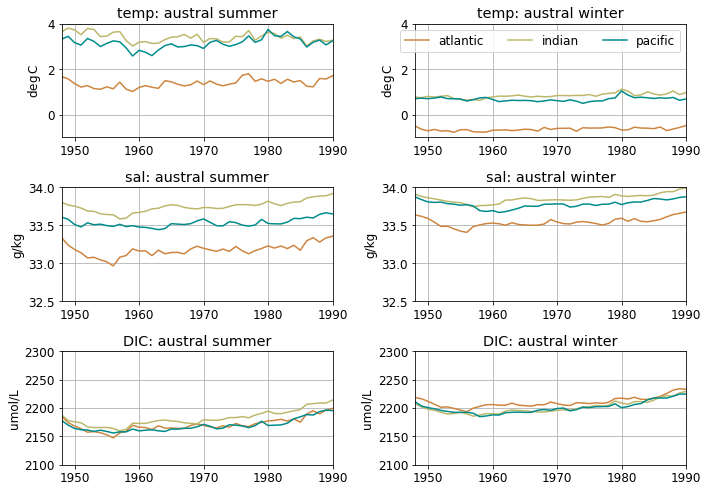

In [45]:
fact = 0.5
ey = 1984
fig, axs = plt.subplots(3,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

cols = ['peru','darkkhaki','darkcyan']
labs = ['atlantic','indian','pacific']
for s in range(0,3):
    axs[0].plot(yrs,temp_sum_bysector[s,:],color = cols[s], label = labs[s])
    axs[1].plot(yrs,temp_wint_bysector[s,:],color = cols[s], label = labs[s])
    axs[2].plot(yrs,sal_sum_bysector[s,:],color = cols[s], label = labs[s])
    axs[3].plot(yrs,sal_wint_bysector[s,:],color = cols[s], label = labs[s])
    axs[4].plot(yrs,dic_sum_bysector[s,:]*1e6,color = cols[s], label = labs[s])
    axs[5].plot(yrs,dic_wint_bysector[s,:]*1e6,color = cols[s], label = labs[s])

tits = ['temp: austral summer', 'temp: austral winter', 'sal: austral summer', 'sal: austral winter',\
        'DIC: austral summer', 'DIC: austral winter']
tmax = [4,4,34,34,2300,2300]
tmin = [-1,-1,32.5,32.5,2100,2100]
tylab = ['$\deg$C','$\deg$C','g/kg','g/kg','umol/L','umol/L']

for i in range(0,6):
    axs[i].grid()
    axs[i].set_xlim(1948,1990)
    axs[i].set_title(tits[i])
    axs[i].set_ylim(tmin[i],tmax[i])
    axs[i].set_ylabel(tylab[i])

axs[1].legend(ncol = 3)
plt.tight_layout()
#plot one to one line
#axs[i].plot([1000,2400],[1000,2400],'k-')

### climatology of DIC?

In [38]:
print((1948-1750)*5475)

1084050


# 

In [39]:
now = datetime.now()


temp_wint_bylat = np.zeros([topend,len(yrs)])
temp_sum_bylat = np.zeros([topend,len(yrs)])
sal_wint_bylat = np.zeros([topend,len(yrs)])
sal_sum_bylat = np.zeros([topend,len(yrs)])
dic_wint_bylat = np.zeros([topend,len(yrs)])
dic_sum_bylat = np.zeros([topend,len(yrs)])

for i in range(0,len(yrs)):
    yr = yrs[i]
    if yr<= 1988:
        trun = 'TOM12_TJ_T001'
    if yr > 1988:
        trun = 'TOM12_TJ_NC02'
    if yr%10==0:
        print(yr)
    #open ptrc_T and grid_T
    w = glob.glob(f'{rdir}{trun}/ORCA*{yr}*ptrc_T.nc')
    tnam = (w[0]); t_ptrc = nc.Dataset(tnam)
    dic = t_ptrc['DIC'][:,0,0:topend,:]
    
    w = glob.glob(f'{rdir}{trun}/ORCA*{yr}*grid_T.nc')
    tnam = (w[0]); t_grid = nc.Dataset(tnam)
    sal = t_grid['vosaline'][:,0,0:topend,:]
    temp = t_grid['votemper'][:,0,0:topend,:]
    
    temp_sum = np.zeros([3,topend,182])
    temp_sum[0,:,:] = temp[0,:,:]; temp_sum[1,:,:] = temp[1,:,:]; temp_sum[2,:,:] = temp[11,:,:]
    temp_wint = temp[5:8,:,:]
    temp_sum_mn = np.nanmean(temp_sum, axis = 0)
    temp_wint_mn = np.nanmean(temp_wint, axis = 0)
    temp_sum_mn[temp_sum_mn == 0] = np.nan
    temp_wint_mn[temp_wint_mn == 0] = np.nan

    dic_sum = np.zeros([3,topend,182])
    dic_sum[0,:,:] = dic[0,:,:]; dic_sum[1,:,:] = dic[1,:,:]; dic_sum[2,:,:] = dic[11,:,:]
    dic_wint = dic[5:8,:,:]
    dic_sum_mn = np.nanmean(dic_sum, axis = 0)
    dic_wint_mn = np.nanmean(dic_wint, axis = 0)
    dic_sum_mn[dic_sum_mn == 0] = np.nan
    dic_wint_mn[dic_wint_mn == 0] = np.nan

    sal_sum = np.zeros([3,topend,182])
    sal_sum[0,:,:] = sal[0,:,:]; sal_sum[1,:,:] = sal[1,:,:]; sal_sum[2,:,:] = sal[11,:,:]
    sal_wint = sal[5:8,:,:]
    sal_sum_mn = np.nanmean(sal_sum, axis = 0)
    sal_wint_mn = np.nanmean(sal_wint, axis = 0)
    sal_sum_mn[sal_sum_mn == 0] = np.nan
    sal_wint_mn[sal_wint_mn == 0] = np.nan
    
    for n in range(0,topend):
        temp_wint_bylat[n,i] = np.nanmean(temp_wint_mn[n,:])
        temp_sum_bylat[n,i] = np.nanmean(temp_sum_mn[n,:])
        sal_wint_bylat[n,i] = np.nanmean(sal_wint_mn[n,:])
        sal_sum_bylat[n,i] = np.nanmean(sal_sum_mn[n,:])
        dic_wint_bylat[n,i] = np.nanmean(dic_wint_mn[n,:])
        dic_sum_bylat[n,i] = np.nanmean(dic_sum_mn[n,:])
        
now2 = datetime.now()
print(now2-now)


1950
1960
1970
1980
1990
0:00:56.863805


In [47]:
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

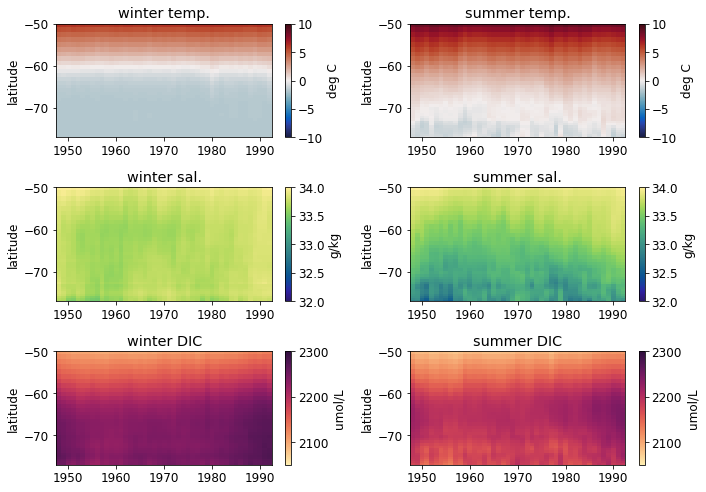

In [54]:
lats = t_grid['nav_lat'][0:37,0]
yrsG, latsG = np.meshgrid(yrs,lats) 

fig, axs = plt.subplots(3,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

mins = [-10,-10,32,32,2050,2050]
maxs = [10,10,34,34,2300,2300]
pbl = [temp_wint_bylat, temp_sum_bylat, sal_wint_bylat, sal_sum_bylat, dic_wint_bylat*1e6, dic_sum_bylat*1e6]
cms = [cm.balance, cm.balance, cm.haline, cm.haline, cm.matter, cm.matter]
tits = ['winter temp.', 'summer temp.', 'winter sal.', 'summer sal.', 'winter DIC', 'summer DIC']
labs = ['deg C', 'deg C', 'g/kg', 'g/kg', 'umol/L', 'umol/L']
for i in range(0,6):
    w = axs[i].pcolormesh(yrsG, latsG, pbl[i],
                  cmap = cms[i], vmin = mins[i], vmax = maxs[i])
    plt.colorbar(w, ax = axs[i], label = labs[i])
    axs[i].set_ylim([-77,-50])
    axs[i].set_title(tits[i])
    axs[i].set_ylabel('latitude')

plt.tight_layout()

In [41]:
t_grid['nav_lat'][0:10,0:2]
print(t_grid)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: ORCA2_1m_19920101_19921231
    description: ocean T grid variables
    title: ocean T grid variables
    Conventions: CF-1.5
    production: An IPSL model
    timeStamp: 2022-Mar-23 14:53:21 GMT
    dimensions(sizes): axis_nbounds(2), x(182), y(149), deptht(31), time_counter(12)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float32 e3t(time_counter,deptht,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 votemper(time_counter,deptht,y,x), float32 vosaline(time_counter,deptht,y,x), float32 tos(time_counter,y,x), float32 sos(time_counter,y,x), float32 zos(time_counter,y,x), float32 mldkz5(time_counter,y,x), float32 mldr10_1(time_counter,y,x), float32 somx

In [42]:
dic_wint_bylat

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.00224796, 0.00225053, 0.00222548, ..., 0.00225991, 0.00226352,
        0.00226727],
       [0.00225786, 0.00225838, 0.00223788, ..., 0.00226989, 0.00227338,
        0.00227265],
       ...,
       [0.00213158, 0.00212854, 0.00212604, ..., 0.00214912, 0.00215195,
        0.00214989],
       [0.00212078, 0.00211847, 0.00211611, ..., 0.00213695, 0.00214088,
        0.0021399 ],
       [0.00210911, 0.00210727, 0.00210528, ..., 0.00212412, 0.00212876,
        0.00212884]])